In [33]:
import pandas as pd
import numpy as np
import pandas_bokeh
pandas_bokeh.output_notebook() 
tesla=pd.read_csv("TSLA.csv",parse_dates=["Date"])

Loading BokehJS ...

In [34]:
tesla


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>]],
      dtype=object)

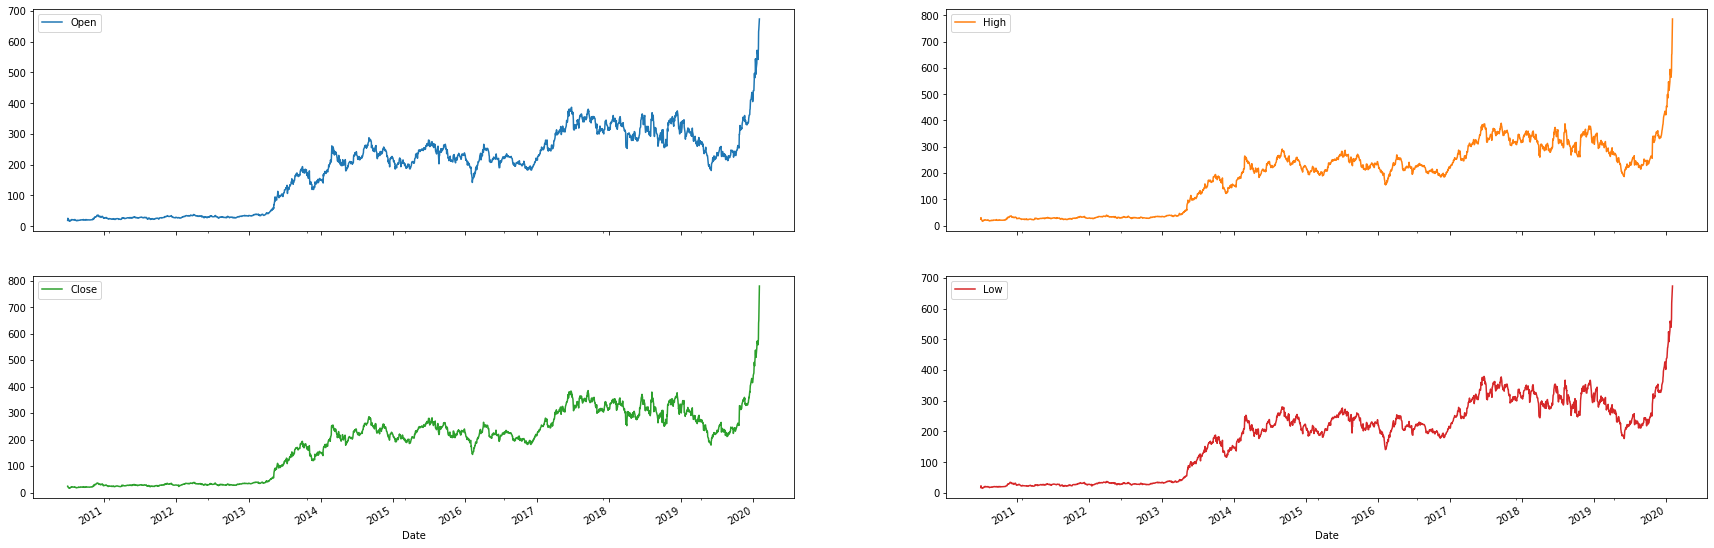

In [35]:
tesla.plot(x="Date",y=["Open","High","Close","Low"],subplots=True,layout=(2,2),figsize=(30,10))#,color=("Red","Green","Green","Red"))

In [36]:
tesla["Close"].mean()

186.40365078187088

In [37]:
def avtesla(stock_price):
    meanvalue=tesla["Close"].mean()
    if stock_price >=meanvalue:
        return "Above Average"
    else:
        return "Below Average"
plotdata=tesla["Close"].apply(avtesla).value_counts()

<AxesSubplot:ylabel='Close'>

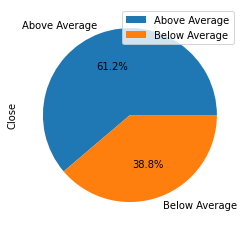

In [38]:
plotdata.plot.pie(autopct='%1.1f%%',legend=True)

<AxesSubplot:>

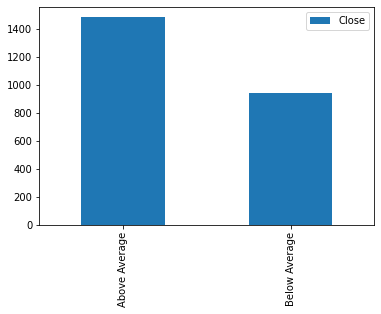

In [39]:
plotdata.to_frame().plot.bar()

In [40]:
datanot2020 = tesla[tesla['Date'].dt.year != 2020]
data2020 = tesla[tesla['Date'].dt.year == 2020]

tesla=datanot2020
p_line1 = tesla.groupby(["Date"]).mean().plot_bokeh(kind="line",y=["Open"],plot_data_points=True,show_figure=False)
p_line1.xaxis.major_label_orientation = "vertical"

p_line2 = tesla.groupby(["Date"]).mean().plot_bokeh(kind="line",y=["Close"],plot_data_points=True,show_figure=False,color="Red")
p_line2.xaxis.major_label_orientation = "vertical"
p_line3 = tesla.groupby(["Date"]).mean().plot_bokeh(kind="line",y=["High"],plot_data_points=True,show_figure=False)
p_line3.xaxis.major_label_orientation = "vertical"
p_line4 = tesla.groupby(["Date"]).mean().plot_bokeh(kind="line",y=["Low"],plot_data_points=True,show_figure=False,color="Red")
p_line4.xaxis.major_label_orientation = "vertical"

p_line4 = plot2020.groupby(["Date"]).mean().plot_bokeh(kind="line",y=["Low"],plot_data_points=True,show_figure=False,color="Red")
p_line4.xaxis.major_label_orientation = "vertical"


pandas_bokeh.plot_grid([[p_line1,p_line2],[p_line3,p_line4]], width=400)


Column(id='6373', ...)

In [41]:
tesla.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object